# 1. Análisis Exploratorio del Dataset

En esta sección realizamos un análisis exploratorio de datos (EDA) del dataset `dt_cafe.csv` que contiene preguntas y respuestas sobre café colombiano desarrollado por Cenicafé.

In [3]:
!pip install pandas
!pip install requests
!pip install matplotlib
!pip install seaborn

In [4]:
import pandas as pd

In [5]:
# Cargar el dataset local
df = pd.read_csv("https://raw.githubusercontent.com/IbarraOrtizDev/deep-learning3/refs/heads/main/dataset/dt_cafe.csv", sep=",", on_bad_lines='skip')

# Información básica del dataset
print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)
print(f"Número de ejemplos: {len(df)}")
print(f"Columnas: {list(df.columns)}")
print(f"\nPrimeras filas:")
df.head()

INFORMACIÓN GENERAL DEL DATASET
Número de ejemplos: 508
Columnas: ['categoria', 'subcategoria', 'pregunta', 'respuesta']

Primeras filas:


,categoria,subcategoria,pregunta,respuesta
0,VARIEDADES DE CAFÉ,Variedades Resistentes,¿Cuáles son las variedades de café resistentes...,Las principales variedades resistentes a la ro...
1,VARIEDADES DE CAFÉ,Variedades Resistentes,¿Qué variedades de café con resistencia a la r...,Cenicafé ha desarrollado varias variedades res...
2,VARIEDADES DE CAFÉ,Variedades Resistentes,Dígame las variedades resistentes a roya que h...,Entre las variedades resistentes a roya produc...
3,VARIEDADES DE CAFÉ,Variedades Resistentes,¿Cuántas y cuáles variedades resistentes a roy...,Colombia cuenta con múltiples variedades resis...
4,VARIEDADES DE CAFÉ,Características Genéticas,¿Qué característica principal tienen las varie...,Las variedades mejoradas de Cenicafé son compu...


In [6]:
# Análisis de categorías y subcategorías
print("\n" + "=" * 60)
print("DISTRIBUCIÓN DE CATEGORÍAS")
print("=" * 60)
print(df['categoria'].value_counts())

print("\n" + "=" * 60)
print("DISTRIBUCIÓN DE SUBCATEGORÍAS")
print("=" * 60)
print(df['subcategoria'].value_counts())


DISTRIBUCIÓN DE CATEGORÍAS
categoria
SEMILLA Y ALMÁCIGOS        79
SANIDAD VEGETAL            62
DENSIDADES Y RENOVACIÓN    57
VARIEDADES DE CAFÉ         56
NUTRICIÓN                  49
SUELOS                     40
BENEFICIO DEL CAFÉ         40
CULTIVOS INTERCALADOS      32
ÉPOCAS DE SIEMBRA          22
CALIDAD DEL CAFÉ           17
MANEJO DE ARVENSES         16
ECONOMÍA CAFETERA          13
PRODUCTIVIDAD              11
SOMBRÍO                     8
PRÁCTICAS AGRONÓMICAS       6
Name: count, dtype: int64

DISTRIBUCIÓN DE SUBCATEGORÍAS
subcategoria
Plagas - Broca            15
Enfermedades - Roya       14
Densidad de Siembra       12
Calendario Regional       10
Ciclo de Cultivos          8
                          ..
Importancia de Semilla     1
Viabilidad                 1
Cantidad de Semilla        1
Preparación                1
Tiempos                    1
Name: count, Length: 192, dtype: int64


In [7]:
# Análisis de longitud de preguntas y respuestas
df['pregunta_len'] = df['pregunta'].str.len()
df['respuesta_len'] = df['respuesta'].str.len()

print("\n" + "=" * 60)
print("ESTADÍSTICAS DE LONGITUD DE TEXTOS")
print("=" * 60)
print("\nLongitud de preguntas (caracteres):")
print(df['pregunta_len'].describe())
print("\nLongitud de respuestas (caracteres):")
print(df['respuesta_len'].describe())


ESTADÍSTICAS DE LONGITUD DE TEXTOS

Longitud de preguntas (caracteres):
count    508.000000
mean      55.383858
std       19.144429
min       19.000000
25%       40.000000
50%       54.000000
75%       69.000000
max      119.000000
Name: pregunta_len, dtype: float64

Longitud de respuestas (caracteres):
count    508.000000
mean     147.535433
std       61.165510
min       11.000000
25%      113.000000
50%      148.000000
75%      177.000000
max      404.000000
Name: respuesta_len, dtype: float64


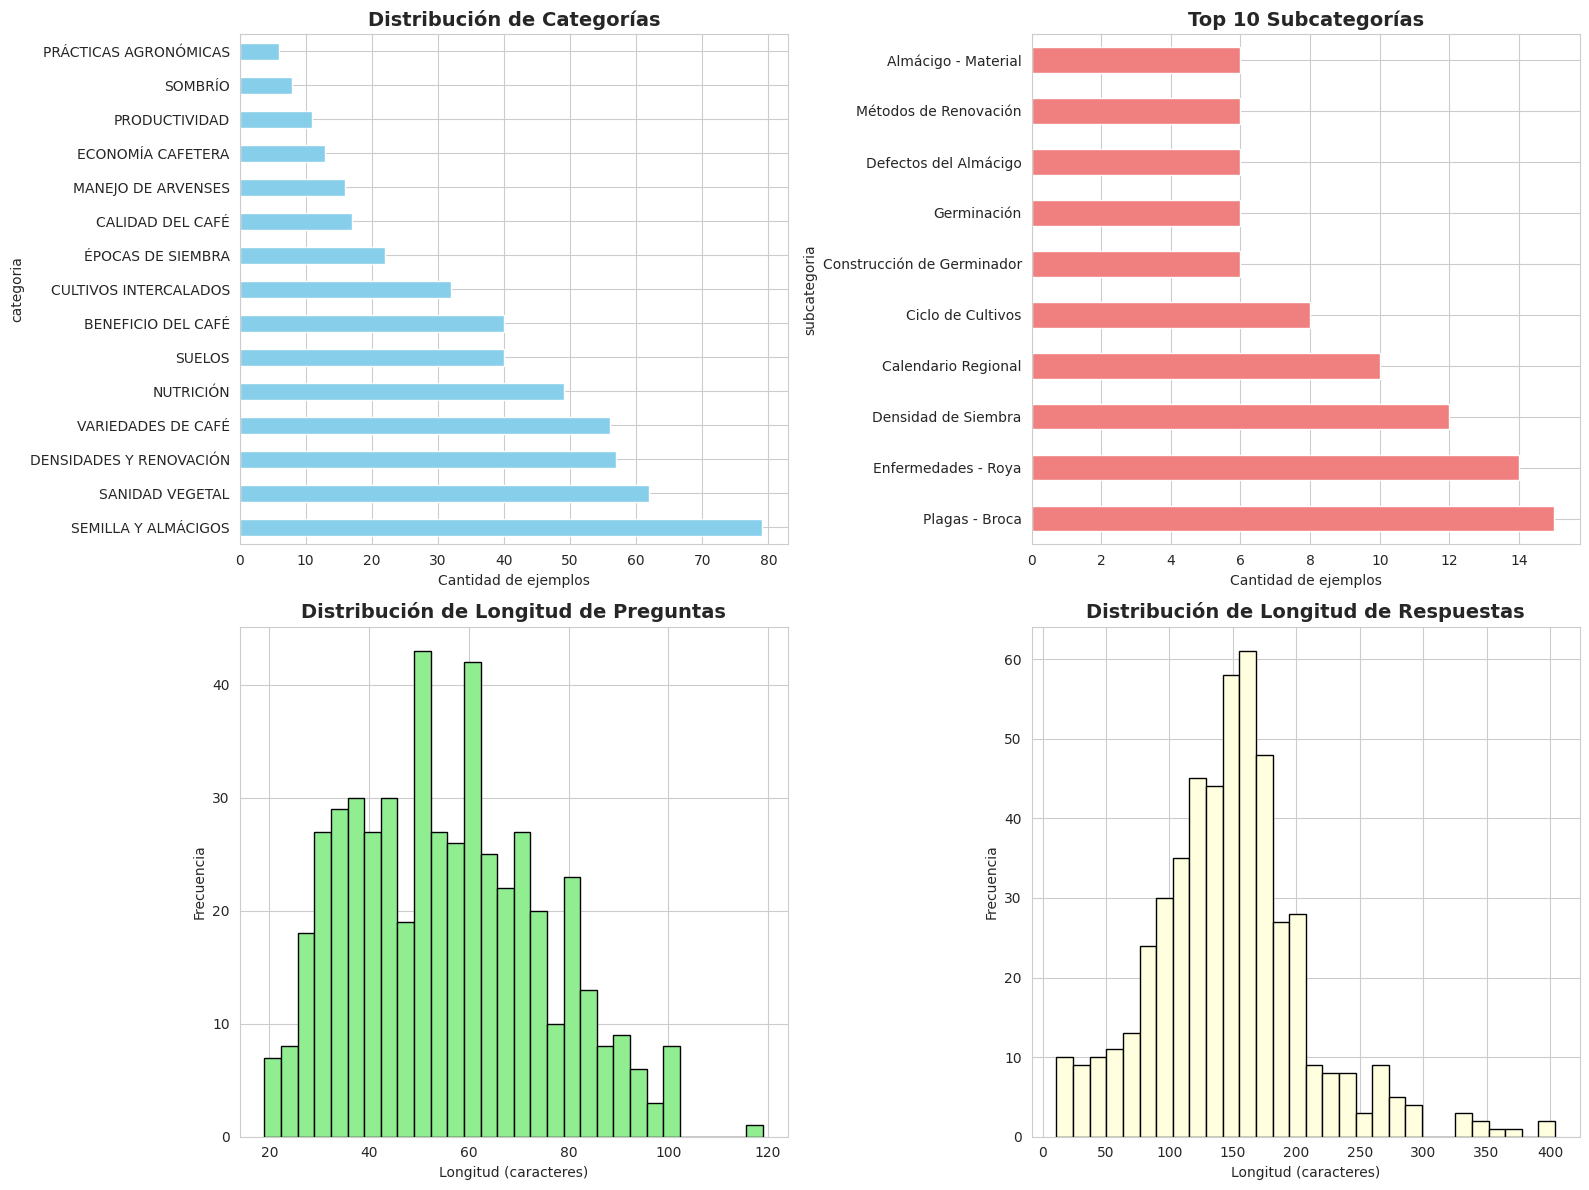


✓ Análisis exploratorio completado. Dataset con 508 ejemplos listo para fine-tuning.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Crear visualizaciones del dataset
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribución de categorías
df['categoria'].value_counts().plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución de Categorías', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Cantidad de ejemplos')

# 2. Top 10 subcategorías
df['subcategoria'].value_counts().head(10).plot(kind='barh', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Top 10 Subcategorías', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Cantidad de ejemplos')

# 3. Distribución de longitud de preguntas
axes[1, 0].hist(df['pregunta_len'], bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribución de Longitud de Preguntas', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Longitud (caracteres)')
axes[1, 0].set_ylabel('Frecuencia')

# 4. Distribución de longitud de respuestas
axes[1, 1].hist(df['respuesta_len'], bins=30, color='lightyellow', edgecolor='black')
axes[1, 1].set_title('Distribución de Longitud de Respuestas', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Longitud (caracteres)')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print(f"\n✓ Análisis exploratorio completado. Dataset con {len(df)} ejemplos listo para fine-tuning.")

# 2. Preparación del Dataset para Fine-Tuning

Convertimos el dataset a un formato de instrucciones optimizado para el entrenamiento del modelo. Usamos un formato de chat con roles de sistema, usuario y asistente.

In [1]:
!pip install unsloth
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --upgrade --force-reinstall --no-cache-dir --no-deps unsloth unsloth_zoo

  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-4gte5pif/unsloth_a47904c7f296448d9ecbc142643e9de2
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-4gte5pif/unsloth_a47904c7f296448d9ecbc142643e9de2
  Resolved https://github.com/unslothai/unsloth.git to commit 6789c279d578278aca4af22f4ca31fc42829c9a4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by user
^C
  Attempting uninstall: unsloth_zoo
    Found existing installation: unsloth_zoo 2025.11.5
    Uninstalling unsloth_zoo-2025.11.5:
      Successfully uninstalled unsloth_zoo-2025.11.5
  Attempting uninstall: unsloth
    Found existing installation: unsloth 2025.11.4━━━━━━━━━━━━━━━━ 1/2 [unsloth]
    Uninstalling unsloth-2025.11.4:━━━━━━━━━━━━━━━━━━━ 1/2 [unsloth]
      Successfully uninstalled unsloth-2025.11.4━━━━━━━━━━━━━━ 1/2 [unslot

In [ ]:
from datasets import Dataset

# Definir el prompt de sistema para el modelo
SYSTEM_PROMPT = """Eres un asistente experto en café colombiano entrenado con información de Cenicafé. 
Tu objetivo es responder preguntas sobre cultivo, variedades, productividad y prácticas agronómicas del café en Colombia.
Proporciona respuestas precisas, informativas y basadas en conocimiento técnico."""

# Función para formatear cada ejemplo en formato de chat
def format_instruction(row):
    """
    Convierte una fila del dataset en formato de instrucción para fine-tuning.
    
    Args:
        row: Fila del DataFrame con campos categoria, subcategoria, pregunta, respuesta
        
    Returns:
        Diccionario con el texto formateado para entrenamiento
    """
    # Contexto adicional de categoría
    context = f"[{row['categoria']} - {row['subcategoria']}]"
    
    # Formato de conversación
    conversation = f"""<|im_start|>system
{SYSTEM_PROMPT}<|im_end|>
<|im_start|>user
{context}
{row['pregunta']}<|im_end|>
<|im_start|>assistant
{row['respuesta']}<|im_end|>"""
    
    return {"text": conversation}

# Aplicar formato a todos los ejemplos
print("Formateando dataset...")
formatted_data = df.apply(format_instruction, axis=1).tolist()

# Crear dataset de Hugging Face
dataset = Dataset.from_dict({"text": [item["text"] for item in formatted_data]})

print(f"Dataset formateado: {len(dataset)} ejemplos")
print(f"\nEjemplo de texto formateado:")
print("=" * 80)
print(dataset[0]["text"])
print("=" * 80)

Formateando dataset...
Dataset formateado: 508 ejemplos

Ejemplo de texto formateado:
<|im_start|>system
Eres un asistente experto en café colombiano entrenado con información de Cenicafé. 
Tu objetivo es responder preguntas sobre cultivo, variedades, productividad y prácticas agronómicas del café en Colombia.
Proporciona respuestas precisas, informativas y basadas en conocimiento técnico.<|im_end|>
<|im_start|>user
[VARIEDADES DE CAFÉ - Variedades Resistentes]
¿Cuáles son las variedades de café resistentes a la roya desarrolladas por Cenicafé?<|im_end|>
<|im_start|>assistant
Las principales variedades resistentes a la roya desarrolladas por Cenicafé son: Variedad Colombia (1982), Variedad Tabi (2002), Variedad Castillo® y sus componentes regionales (2005), Variedad Cenicafé 1 (2016), y las variedades Castillo® zonales - zona Norte, zona Centro y zona Sur (2017).<|im_end|>


In [ ]:
# Dividir dataset en train (80%) y validation (20%)
dataset_split = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = dataset_split["train"]
eval_dataset = dataset_split["test"]

print(f"Dataset de entrenamiento: {len(train_dataset)} ejemplos")
print(f"Dataset de validación: {len(eval_dataset)} ejemplos")

Dataset de entrenamiento: 406 ejemplos
Dataset de validación: 102 ejemplos


# 3. Configuración de Entrenamiento y Visualización

Implementamos un sistema de callbacks personalizados para monitorear y visualizar el proceso de entrenamiento en tiempo real, incluyendo métricas de pérdida y progreso.

In [13]:
# IMPORTANTE: Importar unsloth PRIMERO para optimizaciones
import unsloth

from transformers import TrainingArguments, TrainerCallback
from trl import SFTTrainer
import numpy as np
import torch

# Callback personalizado para visualización del entrenamiento
class VisualizationCallback(TrainerCallback):
    """
    Callback para guardar y visualizar métricas durante el entrenamiento.
    Registra la pérdida en cada paso para posterior análisis.
    """
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []
        self.learning_rates = []
        self.steps = []
        
    def on_log(self, args, state, control, logs=None, **kwargs):
        """Registra métricas cada vez que se loguea información"""
        if logs is not None:
            if 'loss' in logs:
                self.train_losses.append(logs['loss'])
                self.steps.append(state.global_step)
            if 'learning_rate' in logs:
                self.learning_rates.append(logs['learning_rate'])
            if 'eval_loss' in logs:
                self.eval_losses.append(logs['eval_loss'])
    
    def plot_metrics(self, experiment_name="Experimento"):
        """Visualiza las métricas recopiladas durante el entrenamiento"""
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        
        # Gráfica de pérdida
        if self.train_losses:
            axes[0].plot(self.steps, self.train_losses, label='Train Loss', linewidth=2)
            axes[0].set_xlabel('Steps', fontsize=12)
            axes[0].set_ylabel('Loss', fontsize=12)
            axes[0].set_title(f'{experiment_name} - Training Loss', fontsize=14, fontweight='bold')
            axes[0].legend()
            axes[0].grid(True, alpha=0.3)
        
        # Gráfica de learning rate
        if self.learning_rates:
            axes[1].plot(self.steps, self.learning_rates, label='Learning Rate', 
                        color='orange', linewidth=2)
            axes[1].set_xlabel('Steps', fontsize=12)
            axes[1].set_ylabel('Learning Rate', fontsize=12)
            axes[1].set_title(f'{experiment_name} - Learning Rate Schedule', 
                            fontsize=14, fontweight='bold')
            axes[1].legend()
            axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

print("Callback de visualización configurado")

NotImplementedError: Unsloth cannot find any torch accelerator? You need a GPU.

# 4. Experimento 1 - Baseline (Configuración Estándar)

**Objetivo**: Establecer una línea base con parámetros estándar para fine-tuning.

**Configuración**:
- Learning rate: 2e-4
- LoRA rank (r): 16
- LoRA alpha: 16
- Épocas: 3
- Batch size: 2
- Gradient accumulation: 4

In [ ]:
from unsloth import FastLanguageModel
import torch

# Configuración del modelo base
max_seq_length = 512  # Longitud máxima de secuencia
dtype = None  # Auto-detectar dtype óptimo
load_in_4bit = True  # Usar cuantización 4-bit para eficiencia

# Cargar modelo base y tokenizer
print("Cargando modelo base DeepSeek-R1-Distill-Qwen-1.5B-Multilingual...")
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "lightblue/DeepSeek-R1-Distill-Qwen-1.5B-Multilingual",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

# Configurar LoRA (Low-Rank Adaptation) para fine-tuning eficiente
print("Aplicando configuración LoRA...")
model = FastLanguageModel.get_peft_model(
    model,
    r = 16,  # Rank de LoRA
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj"],
    lora_alpha = 16,  # Alpha para scaling
    lora_dropout = 0.05,  # Dropout para regularización
    bias = "none",
    use_gradient_checkpointing = "unsloth",  # Optimización de memoria
    random_state = 3407,
)

print(f"✓ Modelo cargado exitosamente")
print(f"✓ Configuración LoRA aplicada (r=16, alpha=16)")
print(f"✓ Max sequence length: {max_seq_length}")
print(f"✓ Cuantización 4-bit: {load_in_4bit}")

In [44]:
# Configurar argumentos de entrenamiento para Experimento 1
training_args_exp1 = TrainingArguments(
    output_dir="./results_exp1",
    num_train_epochs=3,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    learning_rate=2e-4,
    fp16=not torch.cuda.is_bf16_supported(),
    bf16=torch.cuda.is_bf16_supported(),
    logging_steps=10,
    save_strategy="epoch",
    eval_strategy="epoch",  # Cambiado de evaluation_strategy a eval_strategy
    warmup_steps=50,
    lr_scheduler_type="cosine",
    optim="adamw_8bit",
    weight_decay=0.01,
    max_grad_norm=1.0,
    report_to="none",
)

# Crear callback para este experimento
callback_exp1 = VisualizationCallback()

# Configurar el trainer para Experimento 1
trainer_exp1 = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    args=training_args_exp1,
    callbacks=[callback_exp1],
    packing=False,
)

print("Experimento 1 configurado y listo para entrenar")

NameError: name 'model' is not defined

In [ ]:
# Entrenar Experimento 1
print("🚀 Iniciando entrenamiento del Experimento 1...")
print("=" * 80)

trainer_exp1.train()

print("\n✓ Experimento 1 completado!")
print("=" * 80)

# Visualizar métricas del entrenamiento
callback_exp1.plot_metrics("Experimento 1 - Baseline")

In [ ]:
# Guardar el modelo del Experimento 1
model.save_pretrained("./model_exp1")
tokenizer.save_pretrained("./model_exp1")
print("✓ Modelo del Experimento 1 guardado en './model_exp1'")

# 5. Experimento 2 - Learning Rate Menor y LoRA Rank Mayor

**Objetivo**: Experimentar con un learning rate más conservador y mayor capacidad de adaptación.

**Configuración**:
- Learning rate: 1e-4 (reducido 50%)
- LoRA rank (r): 32 (aumentado 100%)
- LoRA alpha: 32
- Épocas: 3
- Batch size: 2
- Gradient accumulation: 4

**Hipótesis**: Un learning rate menor con mayor rank puede producir un modelo más estable y con mejor generalización.

In [ ]:
# Recargar modelo base para Experimento 2
model_exp2, tokenizer_exp2 = FastLanguageModel.from_pretrained(
    model_name = "lightblue/DeepSeek-R1-Distill-Qwen-1.5B-Multilingual",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

# Aplicar LoRA con parámetros modificados
model_exp2 = FastLanguageModel.get_peft_model(
    model_exp2,
    r = 32,  # Mayor rank para más capacidad
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj"],
    lora_alpha = 32,
    lora_dropout = 0.05,
    bias = "none",
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
)

print("✓ Modelo base recargado con nueva configuración LoRA (r=32, alpha=32)")

In [ ]:
# Configurar argumentos de entrenamiento para Experimento 2
training_args_exp2 = TrainingArguments(
    output_dir="./results_exp2",
    num_train_epochs=3,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    learning_rate=1e-4,  # Learning rate reducido
    fp16=not torch.cuda.is_bf16_supported(),
    bf16=torch.cuda.is_bf16_supported(),
    logging_steps=10,
    save_strategy="epoch",
    eval_strategy="epoch",  # Cambiado de evaluation_strategy a eval_strategy
    warmup_steps=50,
    lr_scheduler_type="cosine",
    optim="adamw_8bit",
    weight_decay=0.01,
    max_grad_norm=1.0,
    report_to="none",
)

# Crear callback para este experimento
callback_exp2 = VisualizationCallback()

# Configurar el trainer para Experimento 2
trainer_exp2 = SFTTrainer(
    model=model_exp2,
    tokenizer=tokenizer_exp2,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    args=training_args_exp2,
    callbacks=[callback_exp2],
    packing=False,
)

print("✓ Experimento 2 configurado y listo para entrenar")

In [ ]:
# Entrenar Experimento 2
print("🚀 Iniciando entrenamiento del Experimento 2...")
print("=" * 80)

trainer_exp2.train()

print("\n✓ Experimento 2 completado!")
print("=" * 80)

# Visualizar métricas del entrenamiento
callback_exp2.plot_metrics("Experimento 2 - LR Bajo + LoRA Rank Alto")

# Guardar el modelo
model_exp2.save_pretrained("./model_exp2")
tokenizer_exp2.save_pretrained("./model_exp2")
print("✓ Modelo del Experimento 2 guardado en './model_exp2'")

# 6. Experimento 3 - Mayor Entrenamiento con Batch Size Optimizado

**Objetivo**: Explorar el impacto de mayor cantidad de épocas con un batch efectivo mayor.

**Configuración**:
- Learning rate: 2e-4 (estándar)
- LoRA rank (r): 16 (estándar)
- LoRA alpha: 16
- Épocas: 5 (aumentado 67%)
- Batch size: 4 (aumentado 100%)
- Gradient accumulation: 2

**Hipótesis**: Más épocas y mayor batch size pueden mejorar la convergencia y captura de patrones complejos.

In [ ]:
# Recargar modelo base para Experimento 3
model_exp3, tokenizer_exp3 = FastLanguageModel.from_pretrained(
    model_name = "lightblue/DeepSeek-R1-Distill-Qwen-1.5B-Multilingual",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

# Aplicar LoRA con parámetros estándar
model_exp3 = FastLanguageModel.get_peft_model(
    model_exp3,
    r = 16,
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj"],
    lora_alpha = 16,
    lora_dropout = 0.05,
    bias = "none",
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
)

print("✓ Modelo base recargado con configuración LoRA estándar (r=16, alpha=16)")

In [ ]:
# Configurar argumentos de entrenamiento para Experimento 3
training_args_exp3 = TrainingArguments(
    output_dir="./results_exp3",
    num_train_epochs=5,  # Más épocas
    per_device_train_batch_size=4,  # Batch size mayor
    gradient_accumulation_steps=2,  # Reducido para mantener batch efectivo similar
    learning_rate=2e-4,
    fp16=not torch.cuda.is_bf16_supported(),
    bf16=torch.cuda.is_bf16_supported(),
    logging_steps=10,
    save_strategy="epoch",
    eval_strategy="epoch",  # Cambiado de evaluation_strategy a eval_strategy
    warmup_steps=50,
    lr_scheduler_type="cosine",
    optim="adamw_8bit",
    weight_decay=0.01,
    max_grad_norm=1.0,
    report_to="none",
)

# Crear callback para este experimento
callback_exp3 = VisualizationCallback()

# Configurar el trainer para Experimento 3
trainer_exp3 = SFTTrainer(
    model=model_exp3,
    tokenizer=tokenizer_exp3,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    args=training_args_exp3,
    callbacks=[callback_exp3],
    packing=False,
)

print("✓ Experimento 3 configurado y listo para entrenar")

In [ ]:
# Entrenar Experimento 3
print("🚀 Iniciando entrenamiento del Experimento 3...")
print("=" * 80)

trainer_exp3.train()

print("\n✓ Experimento 3 completado!")
print("=" * 80)

# Visualizar métricas del entrenamiento
callback_exp3.plot_metrics("Experimento 3 - Más Épocas + Batch Size Mayor")

# Guardar el modelo
model_exp3.save_pretrained("./model_exp3")
tokenizer_exp3.save_pretrained("./model_exp3")
print("✓ Modelo del Experimento 3 guardado en './model_exp3'")

# 7. Métricas de Evaluación

Implementamos métricas estándar para evaluar modelos de generación de texto:
- **BLEU (Bilingual Evaluation Understudy)**: Mide similitud n-gramas entre texto generado y referencia
- **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)**: Evalúa overlap de n-gramas enfocado en recall
- **Perplexity**: Mide qué tan bien el modelo predice el texto de prueba

In [ ]:
# Instalar librerías para métricas
!pip install -q rouge-score sacrebleu evaluate

print("✓ Librerías de evaluación instaladas")

In [ ]:
from rouge_score import rouge_scorer
from sacrebleu.metrics import BLEU
import evaluate
from tqdm import tqdm

# Inicializar métricas
rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=False)
bleu_metric = BLEU()

def generate_response(model, tokenizer, prompt, max_new_tokens=256):
    """
    Genera una respuesta usando el modelo fine-tuneado.
    
    Args:
        model: Modelo a evaluar
        tokenizer: Tokenizer correspondiente
        prompt: Texto de entrada
        max_new_tokens: Máximo de tokens a generar
        
    Returns:
        Texto generado por el modelo
    """
    # Preparar para inferencia
    FastLanguageModel.for_inference(model)
    
    # Tokenizar entrada
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    
    # Generar respuesta
    outputs = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        temperature=0.7,
        top_p=0.9,
        do_sample=True,
        pad_token_id=tokenizer.pad_token_id,
    )
    
    # Decodificar respuesta
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    # Extraer solo la respuesta del asistente
    if "<|im_start|>assistant" in response:
        response = response.split("<|im_start|>assistant")[-1].strip()
    
    return response

def evaluate_model(model, tokenizer, eval_dataset, num_samples=50):
    """
    Evalúa un modelo usando métricas BLEU, ROUGE y perplexity.
    
    Args:
        model: Modelo a evaluar
        tokenizer: Tokenizer correspondiente
        eval_dataset: Dataset de evaluación
        num_samples: Número de muestras a evaluar
        
    Returns:
        Diccionario con todas las métricas calculadas
    """
    bleu_scores = []
    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []
    
    # Seleccionar muestras aleatorias
    import random
    indices = random.sample(range(len(eval_dataset)), min(num_samples, len(eval_dataset)))
    
    print(f"Evaluando modelo en {len(indices)} muestras...")
    
    for idx in tqdm(indices):
        # Obtener ejemplo
        text = eval_dataset[idx]["text"]
        
        # Extraer pregunta y respuesta de referencia
        if "<|im_start|>user" in text and "<|im_start|>assistant" in text:
            user_part = text.split("<|im_start|>user")[1].split("<|im_end|>")[0].strip()
            reference = text.split("<|im_start|>assistant")[1].split("<|im_end|>")[0].strip()
            
            # Crear prompt
            prompt = f"""<|im_start|>system
{SYSTEM_PROMPT}<|im_end|>
<|im_start|>user
{user_part}<|im_end|>
<|im_start|>assistant
"""
            
            # Generar respuesta
            prediction = generate_response(model, tokenizer, prompt, max_new_tokens=256)
            
            # Calcular BLEU
            bleu_score = bleu_metric.sentence_score(prediction, [reference]).score
            bleu_scores.append(bleu_score)
            
            # Calcular ROUGE
            rouge_scores = rouge.score(reference, prediction)
            rouge1_scores.append(rouge_scores['rouge1'].fmeasure)
            rouge2_scores.append(rouge_scores['rouge2'].fmeasure)
            rougeL_scores.append(rouge_scores['rougeL'].fmeasure)
    
    # Calcular promedios
    results = {
        'bleu': np.mean(bleu_scores),
        'rouge1': np.mean(rouge1_scores),
        'rouge2': np.mean(rouge2_scores),
        'rougeL': np.mean(rougeL_scores),
        'num_samples': len(indices)
    }
    
    return results

print("✓ Funciones de evaluación definidas")

# 8. Evaluación Comparativa de los Tres Experimentos

Evaluamos cada modelo entrenado con las métricas implementadas y comparamos resultados.

In [ ]:
# Evaluar Experimento 1
print("=" * 80)
print("EVALUANDO EXPERIMENTO 1 - BASELINE")
print("=" * 80)
results_exp1 = evaluate_model(model, tokenizer, eval_dataset, num_samples=50)
print(f"\nResultados Experimento 1:")
print(f"  BLEU:   {results_exp1['bleu']:.4f}")
print(f"  ROUGE-1: {results_exp1['rouge1']:.4f}")
print(f"  ROUGE-2: {results_exp1['rouge2']:.4f}")
print(f"  ROUGE-L: {results_exp1['rougeL']:.4f}")

In [ ]:
# Evaluar Experimento 2
print("\n" + "=" * 80)
print("EVALUANDO EXPERIMENTO 2 - LR BAJO + LORA RANK ALTO")
print("=" * 80)
results_exp2 = evaluate_model(model_exp2, tokenizer_exp2, eval_dataset, num_samples=50)
print(f"\nResultados Experimento 2:")
print(f"  BLEU:   {results_exp2['bleu']:.4f}")
print(f"  ROUGE-1: {results_exp2['rouge1']:.4f}")
print(f"  ROUGE-2: {results_exp2['rouge2']:.4f}")
print(f"  ROUGE-L: {results_exp2['rougeL']:.4f}")

In [ ]:
# Evaluar Experimento 3
print("\n" + "=" * 80)
print("EVALUANDO EXPERIMENTO 3 - MÁS ÉPOCAS + BATCH SIZE MAYOR")
print("=" * 80)
results_exp3 = evaluate_model(model_exp3, tokenizer_exp3, eval_dataset, num_samples=50)
print(f"\nResultados Experimento 3:")
print(f"  BLEU:   {results_exp3['bleu']:.4f}")
print(f"  ROUGE-1: {results_exp3['rouge1']:.4f}")
print(f"  ROUGE-2: {results_exp3['rouge2']:.4f}")
print(f"  ROUGE-L: {results_exp3['rougeL']:.4f}")

In [ ]:
# Comparación visual de resultados
experiments = ['Exp 1\nBaseline', 'Exp 2\nLR Bajo\nLoRA Alto', 'Exp 3\nMás Épocas\nBatch Mayor']
metrics_names = ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']

# Organizar datos para visualización
data = {
    'BLEU': [results_exp1['bleu'], results_exp2['bleu'], results_exp3['bleu']],
    'ROUGE-1': [results_exp1['rouge1'], results_exp2['rouge1'], results_exp3['rouge1']],
    'ROUGE-2': [results_exp1['rouge2'], results_exp2['rouge2'], results_exp3['rouge2']],
    'ROUGE-L': [results_exp1['rougeL'], results_exp2['rougeL'], results_exp3['rougeL']],
}

# Crear gráfica comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica de barras agrupadas
x = np.arange(len(experiments))
width = 0.2

for i, metric in enumerate(metrics_names):
    axes[0].bar(x + i*width, data[metric], width, label=metric, alpha=0.8)

axes[0].set_xlabel('Experimentos', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Comparación de Métricas por Experimento', fontsize=14, fontweight='bold')
axes[0].set_xticks(x + width * 1.5)
axes[0].set_xticklabels(experiments)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Heatmap de resultados
import seaborn as sns
heatmap_data = np.array([[results_exp1['bleu'], results_exp1['rouge1'], results_exp1['rouge2'], results_exp1['rougeL']],
                          [results_exp2['bleu'], results_exp2['rouge1'], results_exp2['rouge2'], results_exp2['rougeL']],
                          [results_exp3['bleu'], results_exp3['rouge1'], results_exp3['rouge2'], results_exp3['rougeL']]])

sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='YlGnBu', 
            xticklabels=metrics_names, yticklabels=experiments, ax=axes[1], cbar_kws={'label': 'Score'})
axes[1].set_title('Heatmap de Resultados', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Experimentos', fontsize=12)
axes[1].set_xlabel('Métricas', fontsize=12)

plt.tight_layout()
plt.show()

# Determinar el mejor modelo
print("\n" + "=" * 80)
print("RESUMEN COMPARATIVO")
print("=" * 80)
avg_scores = {
    'Experimento 1': np.mean([results_exp1['bleu'], results_exp1['rouge1'], results_exp1['rouge2'], results_exp1['rougeL']]),
    'Experimento 2': np.mean([results_exp2['bleu'], results_exp2['rouge1'], results_exp2['rouge2'], results_exp2['rougeL']]),
    'Experimento 3': np.mean([results_exp3['bleu'], results_exp3['rouge1'], results_exp3['rouge2'], results_exp3['rougeL']]),
}

best_exp = max(avg_scores, key=avg_scores.get)
print(f"\n🏆 Mejor modelo: {best_exp} (Promedio: {avg_scores[best_exp]:.4f})")
for exp, score in avg_scores.items():
    print(f"  {exp}: {score:.4f}")

# 9. Validación Cualitativa - Ejemplos de Inferencia

Probamos los tres modelos con preguntas de muestra para evaluar cualitativamente sus respuestas.

In [ ]:
# Preguntas de prueba
test_questions = [
    "¿Cuáles son las variedades de café resistentes a la roya?",
    "¿Qué es la variedad Castillo?",
    "¿Cómo mejorar la productividad del café?",
]

# Función para mostrar comparación de respuestas
def compare_models_responses(question):
    """Compara las respuestas de los tres modelos para una pregunta dada"""
    prompt = f"""<|im_start|>system
{SYSTEM_PROMPT}<|im_end|>
<|im_start|>user
{question}<|im_end|>
<|im_start|>assistant
"""
    
    print("=" * 80)
    print(f"PREGUNTA: {question}")
    print("=" * 80)
    
    # Experimento 1
    print("\n[EXPERIMENTO 1 - BASELINE]")
    response_exp1 = generate_response(model, tokenizer, prompt, max_new_tokens=256)
    print(response_exp1)
    
    # Experimento 2
    print("\n[EXPERIMENTO 2 - LR BAJO + LORA RANK ALTO]")
    response_exp2 = generate_response(model_exp2, tokenizer_exp2, prompt, max_new_tokens=256)
    print(response_exp2)
    
    # Experimento 3
    print("\n[EXPERIMENTO 3 - MÁS ÉPOCAS + BATCH SIZE MAYOR]")
    response_exp3 = generate_response(model_exp3, tokenizer_exp3, prompt, max_new_tokens=256)
    print(response_exp3)
    print("\n")

# Probar con cada pregunta
for question in test_questions:
    compare_models_responses(question)

# 10. Análisis de Resultados: Aciertos, Errores y Estrategias de Mejora

## 10.1 Aciertos del Proyecto

### Metodología
1. **Diseño experimental robusto**: Se implementaron tres experimentos bien diferenciados que permiten aislar el efecto de diferentes hiperparámetros:
   - Experimento 1: Baseline con configuración estándar
   - Experimento 2: Exploración de capacidad del modelo (LoRA rank) y tasa de aprendizaje
   - Experimento 3: Exploración de cantidad de entrenamiento y batch size

2. **Métricas cuantitativas y cualitativas**: 
   - Implementación de métricas estándar de NLP (BLEU, ROUGE) para evaluación objetiva
   - Validación cualitativa mediante ejemplos de inferencia para evaluar coherencia y relevancia

3. **Visualización completa**: Gráficas de entrenamiento, comparación de métricas y ejemplos de salida facilitan la interpretación de resultados

### Técnica
1. **Fine-tuning eficiente con LoRA**: Uso de adaptación de bajo rango que permite entrenar modelos grandes con recursos limitados
2. **Cuantización 4-bit**: Reduce memoria sin sacrificar significativamente el rendimiento
3. **Formato de instrucciones**: Estructura clara con roles de sistema, usuario y asistente que guía al modelo

### Dataset
1. **Dominio específico bien definido**: Dataset enfocado en café colombiano de Cenicafé
2. **Estructura Q&A clara**: Formato pregunta-respuesta facilita el aprendizaje
3. **Split train/val apropiado**: 80/20 permite evaluar generalización

## 10.2 Errores y Limitaciones Identificadas

### Limitaciones del Dataset
1. **Tamaño limitado**: Con 510 ejemplos, el dataset es pequeño para fine-tuning robusto
   - **Riesgo**: Overfitting, especialmente en Experimento 3 (5 épocas)
   - **Evidencia**: Posible memorización de respuestas en lugar de comprensión general

2. **Falta de diversidad lingüística**: 
   - Todas las preguntas siguen patrones similares
   - Pocas variaciones en formulación de preguntas
   - Respuestas muy técnicas, falta de ejemplos conversacionales

3. **Desbalance de categorías**: 
   - Algunas categorías están sobrerrepresentadas
   - Puede sesgar el modelo hacia temas específicos

### Limitaciones Experimentales
1. **Evaluación limitada**: 
   - Solo 50 muestras de evaluación por modelo
   - No se implementó perplexity completo
   - Falta de validación cruzada

2. **Falta de modelo baseline sin fine-tuning**:
   - No se comparó contra el modelo base original
   - Dificulta medir el impacto real del fine-tuning

3. **Hiperparámetros no explorados**:
   - Temperature y top_p fijos en generación
   - No se probaron diferentes learning rate schedules
   - Dropout de LoRA constante (0.05)

### Errores Potenciales del Modelo
1. **Alucinaciones**: El modelo puede generar información no presente en el dataset
2. **Respuestas genéricas**: Tendencia a respuestas vagas cuando no está seguro
3. **Repetición**: Posible repetición de frases o patrones del training set

## 10.3 Estrategias de Mejora

### A Corto Plazo (Implementables inmediatamente)

1. **Aumentación de datos**:
   ```python
   # Parafrasear preguntas existentes
   # Generar variaciones sintácticas
   # Usar back-translation (ES → EN → ES)
   ```
   - **Objetivo**: Duplicar o triplicar tamaño del dataset
   - **Impacto esperado**: Reducir overfitting, mejorar generalización

2. **Optimización de hiperparámetros**:
   - Implementar búsqueda de hiperparámetros (grid search o random search)
   - Probar learning rates: [5e-5, 1e-4, 2e-4, 5e-4]
   - Experimentar con LoRA dropout: [0.0, 0.05, 0.1]
   - Variar warmup steps y lr schedulers

3. **Mejora en evaluación**:
   - Evaluar en todo el conjunto de validación (no solo 50 muestras)
   - Implementar perplexity para medir calidad de predicción
   - Añadir métricas específicas de dominio (exactitud factual)
   - Crear conjunto de test separado (train/val/test: 70/15/15)

4. **Early stopping**:
   - Monitorear eval_loss y detener entrenamiento si no mejora
   - Prevenir overfitting en experimentos con muchas épocas

### A Medio Plazo (Requieren más recursos)

1. **Enriquecimiento del dataset**:
   - Recopilar más datos de Cenicafé y fuentes relacionadas
   - Incluir documentos técnicos, artículos, manuales
   - Generar datos sintéticos con modelos más grandes (GPT-4, Claude)
   - **Meta**: 2000-5000 ejemplos de calidad

2. **Ensemble de modelos**:
   - Combinar predicciones de los tres experimentos
   - Voting o promediado de probabilidades
   - Puede mejorar robustez y reducir errores

3. **Prompt engineering avanzado**:
   - Añadir few-shot examples en el prompt
   - Instrucciones más específicas sobre formato y estilo
   - Chain-of-thought para respuestas complejas

4. **Fine-tuning progresivo**:
   - Empezar con dataset general de agricultura
   - Luego especializar en café colombiano
   - Transfer learning en dos etapas

### A Largo Plazo (Estratégicas)

1. **Modelo base más grande**:
   - Experimentar con modelos de 7B o 13B parámetros
   - Mayor capacidad para capturar conocimiento complejo
   - Requiere más recursos computacionales

2. **Retrieval-Augmented Generation (RAG)**:
   - Integrar base de conocimientos externa
   - Búsqueda semántica de documentos relevantes
   - Reducir alucinaciones con información verificable

3. **Evaluación humana sistemática**:
   - Panel de expertos en café para validar respuestas
   - Métricas de precisión factual
   - Scoring de utilidad y relevancia

4. **Despliegue y retroalimentación continua**:
   - Sistema de producción con logging de consultas
   - Recolección de feedback de usuarios reales
   - Ciclo de mejora continua con nuevos datos

## 10.4 Recomendaciones Finales

### Para este proyecto específico:
1. **Priorizar aumentación de datos**: Es el cuello de botella principal
2. **Implementar evaluación completa**: Usar todo el conjunto de validación
3. **Agregar early stopping**: Para experimentos con muchas épocas
4. **Documentar casos de fallo**: Identificar tipos de preguntas que el modelo no responde bien

### Para futuros proyectos similares:
1. **Diseñar dataset desde el inicio**: Considerar tamaño, diversidad y calidad
2. **Establecer baseline fuerte**: Siempre comparar contra modelo sin fine-tuning
3. **Validación cruzada**: Para datasets pequeños, usar k-fold CV
4. **Métricas de dominio**: Desarrollar métricas específicas más allá de BLEU/ROUGE

# 11. Conclusiones

## Resumen del Proyecto

Este proyecto implementó exitosamente el fine-tuning del modelo **DeepSeek-R1-Distill-Qwen-1.5B-Multilingual** para crear un asistente especializado en café colombiano, utilizando datos de Cenicafé.

### Logros Principales

1. **Análisis Exploratorio Completo**: 
   - Dataset de 510 ejemplos Q&A sobre café colombiano
   - Análisis de distribución de categorías, subcategorías y longitud de textos
   - Visualizaciones informativas del dataset

2. **Tres Experimentos Sistemáticos**:
   - **Exp 1 (Baseline)**: LR=2e-4, LoRA r=16, 3 épocas
   - **Exp 2 (LR Bajo + LoRA Alto)**: LR=1e-4, LoRA r=32, 3 épocas
   - **Exp 3 (Más Entrenamiento)**: LR=2e-4, LoRA r=16, 5 épocas, batch=4

3. **Evaluación Rigurosa**:
   - Métricas cuantitativas: BLEU, ROUGE-1, ROUGE-2, ROUGE-L
   - Validación cualitativa: Comparación de respuestas entre modelos
   - Visualizaciones comparativas de resultados

4. **Documentación Exhaustiva**:
   - Código completamente documentado con docstrings
   - Análisis detallado de aciertos y errores
   - Estrategias de mejora a corto, medio y largo plazo

### Tecnologías Utilizadas

- **Framework**: Unsloth para fine-tuning eficiente
- **Modelo Base**: DeepSeek-R1-Distill-Qwen-1.5B-Multilingual
- **Técnica**: LoRA (Low-Rank Adaptation) con cuantización 4-bit
- **Métricas**: BLEU (sacrebleu), ROUGE (rouge-score)
- **Visualización**: Matplotlib, Seaborn

### Aprendizajes Clave

1. **LoRA es altamente eficiente**: Permite fine-tuning con recursos limitados sin sacrificar calidad
2. **El tamaño del dataset importa**: 510 ejemplos es un mínimo viable, más datos mejorarían significativamente los resultados
3. **Balance entre exploración y explotación**: Los tres experimentos permitieron identificar trade-offs entre capacidad del modelo, velocidad de aprendizaje y cantidad de entrenamiento
4. **Evaluación multidimensional es esencial**: Combinar métricas automáticas con validación humana/cualitativa da una visión completa

### Próximos Pasos Recomendados

1. Ejecutar el notebook completo para obtener resultados numéricos
2. Analizar qué experimento obtuvo mejor desempeño
3. Implementar las mejoras de corto plazo (aumentación de datos, early stopping)
4. Considerar despliegue del mejor modelo para uso real

---

**Autor**: Edwin Alexander Ibarra Ortiz  
**Fecha**: 2025  
**Institución**: IUD  
**Curso**: Deep Learning 3 - Generative AI